# Strukturní klíče

In [54]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from pprint import pprint

In [13]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in supp if m]
len(drugbank)

7110

In [32]:
substructs = {
    'COO': Chem.MolFromSmarts("C(=O)O"),
    'benzene': Chem.MolFromSmarts("c1ccccc1"),
    'N': Chem.MolFromSmarts("[#7]"),
    'halogen': Chem.MolFromSmarts("[F,Cl,Br,I]"),
    'triple_bond': Chem.MolFromSmarts("*#*"),
    'S': Chem.MolFromSmarts("S"),
    #'aromatic_s': Chem.MolFromSmarts("s"),
    'aliphatic_c': Chem.MolFromSmarts("C")
    #'inorganic': Chem.MolFromSmarts("[[!#1];[!#6];[!#7];[!#8];[!#16];!Cl;!F;!Br;!I]")
}

pattern_names = tuple(substructs.keys())
pattern_names

('COO', 'benzene', 'N', 'halogen', 'triple_bond', 'S', 'aliphatic_c')

In [15]:
substructs.items()

dict_items([('COO', <rdkit.Chem.rdchem.Mol object at 0x7fe620e89ee0>), ('benzene', <rdkit.Chem.rdchem.Mol object at 0x7fe6207c2350>), ('N', <rdkit.Chem.rdchem.Mol object at 0x7fe6207c23f0>), ('halogen', <rdkit.Chem.rdchem.Mol object at 0x7fe6207c23a0>), ('triple_bond', <rdkit.Chem.rdchem.Mol object at 0x7fe6207c2440>), ('S', <rdkit.Chem.rdchem.Mol object at 0x7fe6207c2490>), ('aromatic_s', <rdkit.Chem.rdchem.Mol object at 0x7fe6207c24e0>), ('aliphatic_c', <rdkit.Chem.rdchem.Mol object at 0x7fe6207c2530>)])

In [16]:
def apply_substruct_key(m, p_names, p_list):
    hits = [m.HasSubstructMatch(p_list[name]) for name in p_names]
    return tuple(hits)

In [7]:
pprint([pattern_names, apply_substruct_key(drugbank[2222], pattern_names, substructs)])

[('COO',
  'benzene',
  'N',
  'halogen',
  'triple_bond',
  'S',
  'aromatic_s',
  'aliphatic_c'),
 (True, False, True, False, False, False, False, True)]


In [ ]:
Draw.MolToImage(drugbank[2222])

[(True, True, True, False, False, False, True),
 (False, True, True, False, False, False, True),
 (False, True, True, False, False, True, True),
 (False, True, True, True, False, False, True),
 (False, False, True, False, False, False, True)]
6830


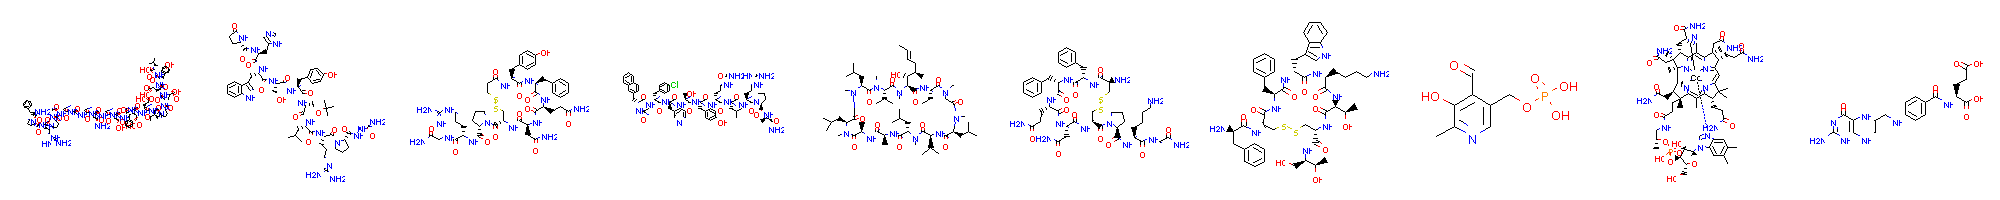

In [53]:
hits = [apply_substruct_key(m, pattern_names, substructs) for m in drugbank]
pprint(hits[:5])
custom = [m for m in drugbank if apply_substruct_key(m, pattern_names, substructs)[6]]
print(len(custom))
Draw.MolsToImage(custom[0:10])

In [34]:
counts = list(map(sum, zip(*hits)))
counts

[2397, 4286, 5679, 1637, 246, 1355, 6830]

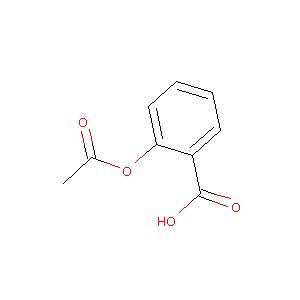

In [35]:
aspirin = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")
Draw.MolToImage(aspirin)

In [36]:
aspirin_key = apply_substruct_key(aspirin, pattern_names, substructs)
aspirin_key

(True, True, False, False, False, False, True)

In [40]:
aspirin_key_hits = [i for i, key in enumerate(hits) if key == aspirin_key]

len(aspirin_key_hits)
print(aspirin_key_hits[:5])

[101, 197, 263, 331, 346]


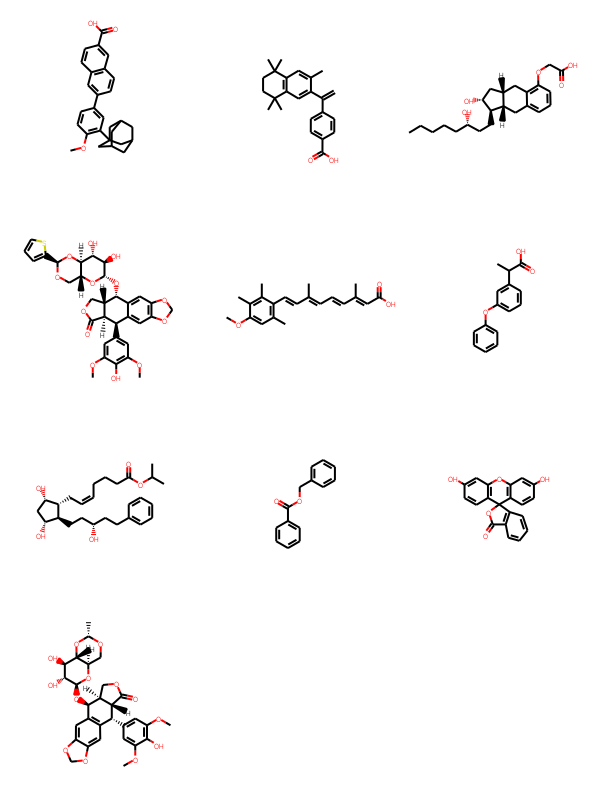

In [49]:
Draw.MolsToGridImage([drugbank[i] for i in aspirin_key_hits[:10]])

# Superstruktury

In [89]:
def pot_superstruct(super_key, query_key): #obe musi mit alespon stejne True polozky
    for s, q in zip(super_key, query_key):
        if q and not s:
            return False
        return True

In [76]:
#superstruktura je to, ceho muze byt aspirin podgrafem
aspirin_pot_superstructs = [i for i, key in enumerate(hits) if pot_superstruct(key, aspirin_key)]
len(aspirin_pot_superstructs)

2397

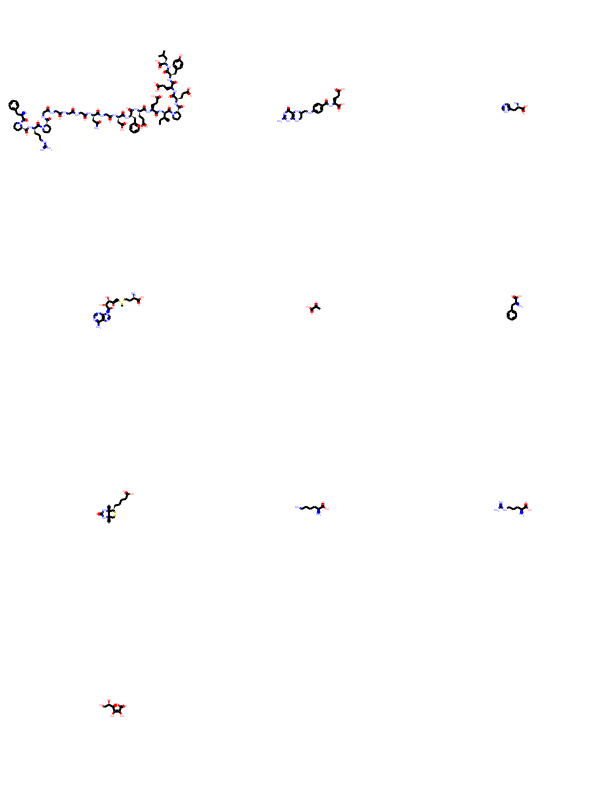

In [45]:
Draw.MolsToGridImage([drugbank[i] for i in aspirin_pot_superstructs[:10]])

# MACCS Keys

MACCS jsou skoro to samé, jako ten dict, co jsme si definovali. Jen je to širší. Pak se používají bitové vektory, které říkají, které jednotlivé SMARTS ta struktura obsahuje.

In [73]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]
len(drugbank_maccs)

7110

In [74]:
list(drugbank_maccs[0].GetOnBits()) #ktere substruktury jsou on

[25,
 43,
 53,
 54,
 74,
 75,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 90,
 91,
 92,
 95,
 96,
 97,
 100,
 104,
 106,
 110,
 111,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 127,
 128,
 129,
 131,
 132,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165]

In [77]:
aspirin_maccs = MACCSkeys.GenMACCSKeys(aspirin)
tuple(aspirin_maccs.GetOnBits())

(89,
 113,
 123,
 126,
 127,
 136,
 139,
 140,
 143,
 144,
 146,
 150,
 152,
 154,
 157,
 159,
 160,
 162,
 163,
 164,
 165)

In [78]:
aspirin_maccs_hits = [i for i, key in enumerate(drugbank_maccs) if key == aspirin_maccs]
aspirin_maccs_hits

[824]

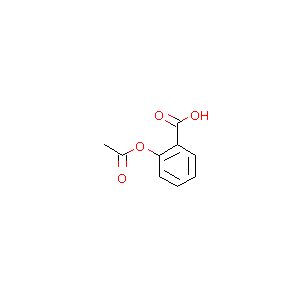

In [79]:
Draw.MolToImage(drugbank[824])

In [88]:
def pot_maccs_superstruct(super_key, query_key): # => minimalne stejne bity, ktere obsahuje query
    for on_bit in query_key.GetOnBits(): #vsechny zapnute bity v query - indexy
        if not super_key.GetBit(on_bit): #kdyz je bit na tomto indexu v targetu vypnuty -> vyrazeni
            return False
    return True

In [85]:
aspirin_pot_maccs_superstructs = [i for i, key in enumerate(drugbank_maccs) if pot_maccs_superstruct(key, aspirin_maccs)]
len(aspirin_pot_maccs_superstructs)

108

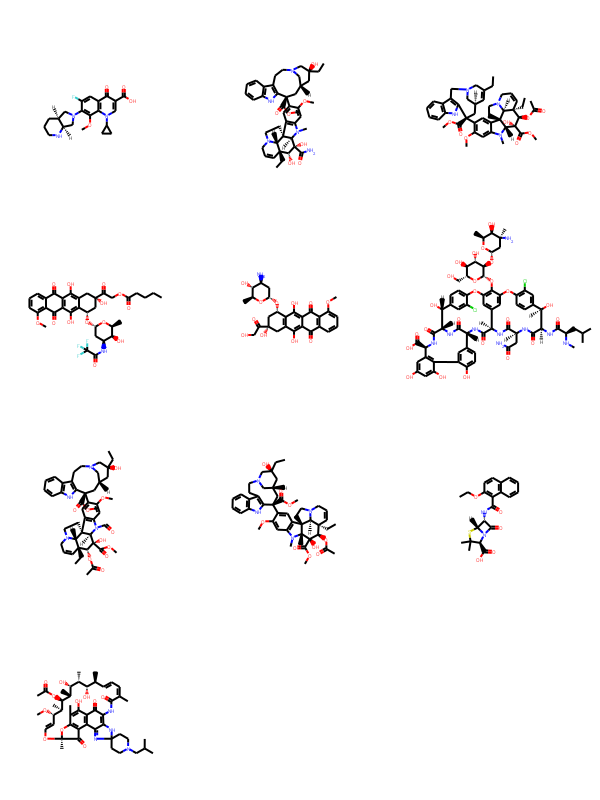

In [86]:
Draw.MolsToGridImage([drugbank[i] for i in aspirin_pot_maccs_superstructs[:10]])